In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("C:/Users/parit/Downloads/Fraud_check.csv")

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
f=lambda x:"Risky" if x<=30000 else "good"
data["Taxable.Income"]=data["Taxable.Income"].apply(f)

In [5]:
f=lambda x:0 if x=="Risky" else 1
data["Taxable.Income"]=data["Taxable.Income"].apply(f)

In [6]:
f=lambda x:0 if x=="NO" else 1
data["Undergrad"]=data["Undergrad"].apply(f)

In [7]:
f=lambda x:1 if x=="Single" else 2 if x=="Married" else 3
data["Marital.Status"]=data["Marital.Status"].apply(f)

In [8]:
f=lambda x:1 if x=="YES" else 0
data["Urban"]=data["Urban"].apply(f)

### Consider Taxable.Income which is <=30000 is risky and  >30000 is good represents risky as 0 and good as 1.
### Convert NO as 0 and YES as 1 in Undergrad column.
### Convert single as 1 , married as 2 and divorce as 3 in Martial.Status column.
### Convert NO as 0 and YES as 1 in Urban column.

In [9]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,1,1,50047,10,1
1,1,3,1,134075,18,1
2,0,2,1,160205,30,1
3,1,1,1,193264,15,1
4,0,2,1,27533,28,0


In [10]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [11]:
x=data[['Undergrad', 'Marital.Status', 'City.Population',
       'Work.Experience', 'Urban']]
y=data["Taxable.Income"]

## EDA

<Axes: xlabel='Undergrad', ylabel='count'>

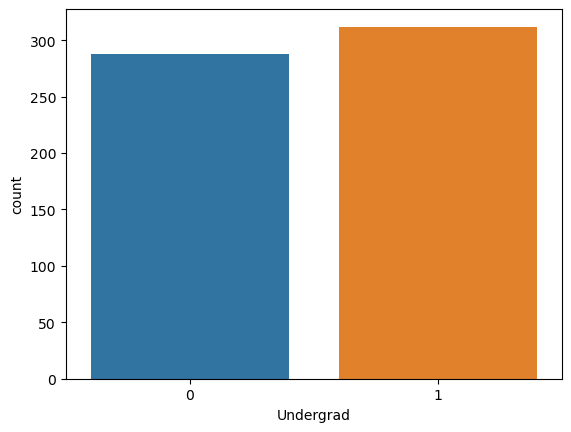

In [12]:
sns.countplot(x=data.Undergrad,data=data)

<Axes: xlabel='Undergrad', ylabel='count'>

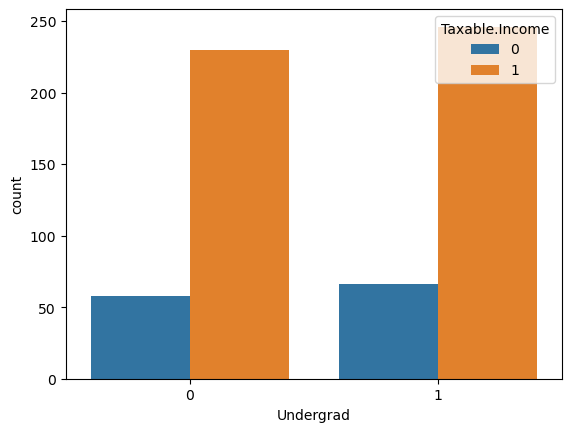

In [15]:
sns.countplot(x=data.Undergrad,hue=data["Taxable.Income"],data=data)

<Axes: xlabel='Marital.Status', ylabel='count'>

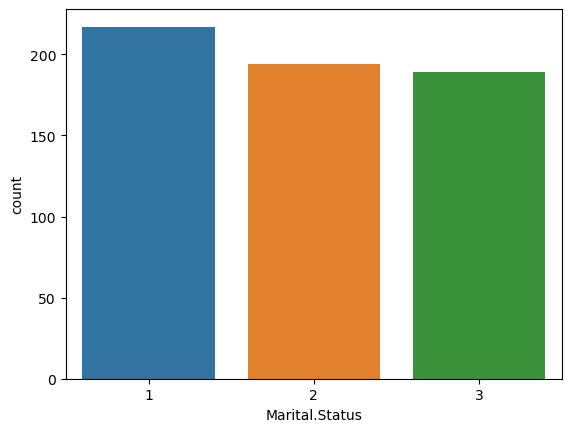

In [14]:
sns.countplot(x=data["Marital.Status"],data=data)

<Axes: xlabel='Marital.Status', ylabel='count'>

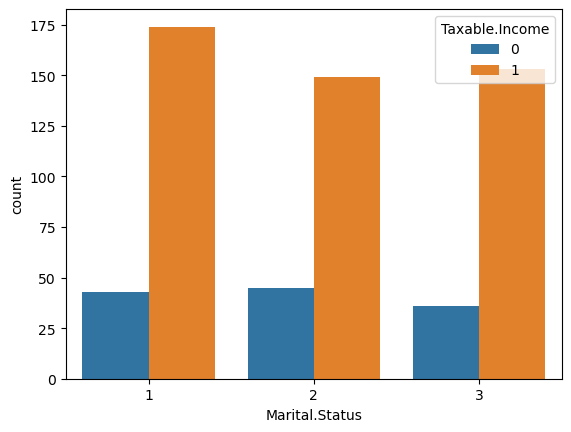

In [16]:
sns.countplot(x=data["Marital.Status"],hue=data["Taxable.Income"],data=data)

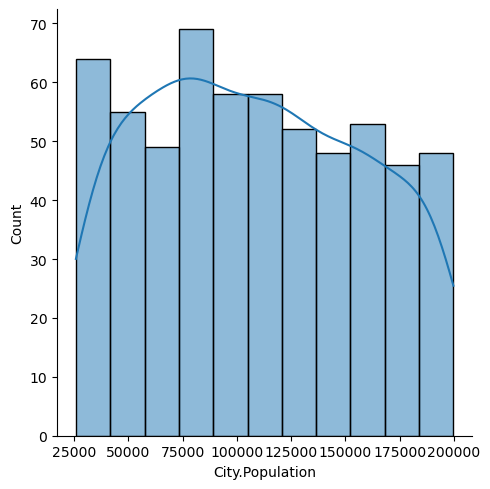

In [18]:
sns.displot(x=data["City.Population"],data=data,kde=True)

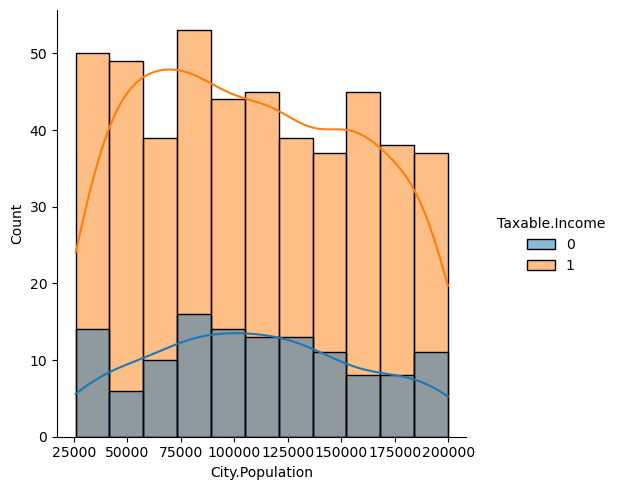

In [23]:
sns.displot(x=data["City.Population"],hue=data["Taxable.Income"],data=data,kde=True)

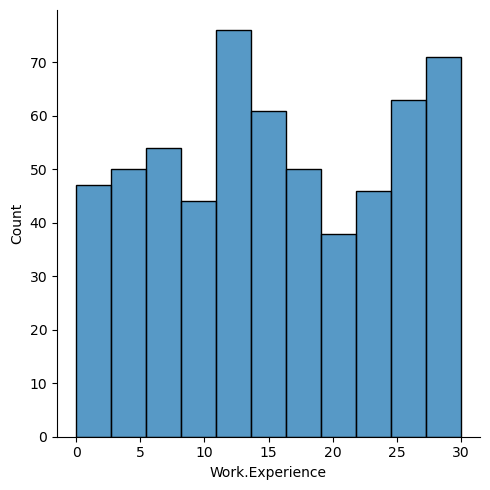

In [20]:
sns.displot(x=data["Work.Experience"],data=data)

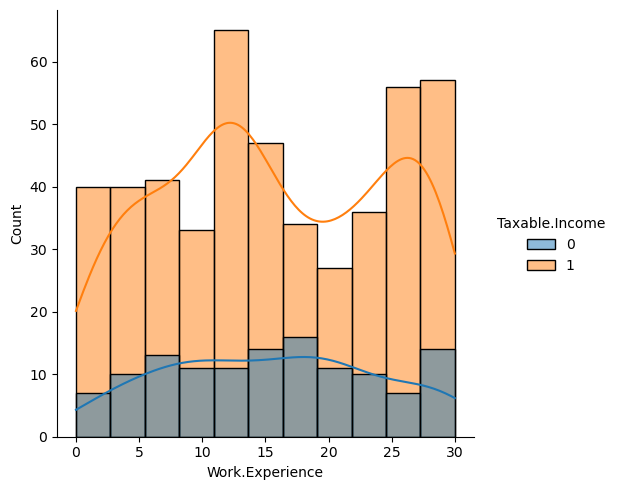

In [27]:
sns.displot(x=data["Work.Experience"],hue=data["Taxable.Income"],data=data,kde=True)

<Axes: xlabel='Urban', ylabel='count'>

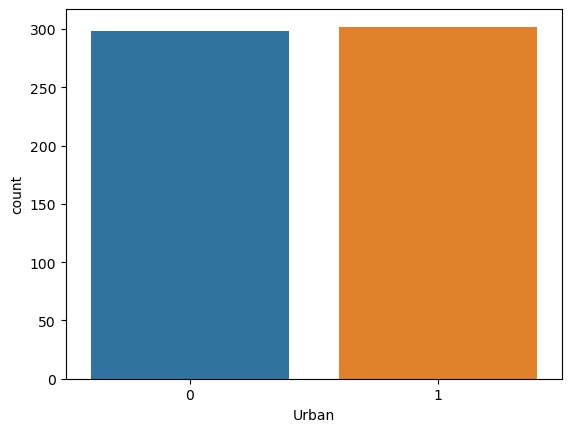

In [25]:
sns.countplot(x=data.Urban,data=data)

<Axes: xlabel='Urban', ylabel='count'>

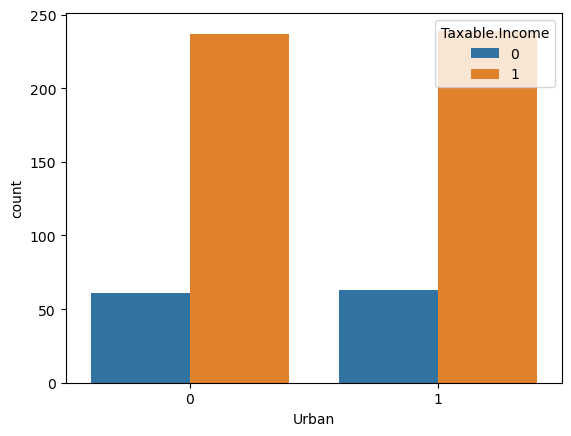

In [26]:
sns.countplot(x=data.Urban,hue=data["Taxable.Income"],data=data)

In [28]:
### Take away from EDA
# 1. undergrad having good taxable income
# 2. single having good taxable income 
# 3. city population with 60000 to 80000 having good taxable income
# 4. working experince with 11 to 14 having good taxable income

<Axes: >

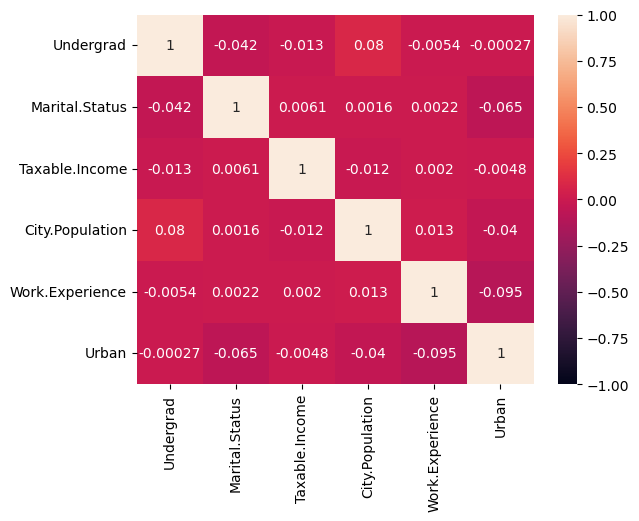

In [40]:
sns.heatmap(data.corr(),vmin=-1,annot=True)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf=RandomForestClassifier(criterion="entropy")

In [33]:
model=rf.fit(x_train,y_train)

In [34]:
pred=model.predict(x_test)
pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [36]:
print("accuracy score of training data =",model.score(x_train,y_train))
print("accuracy score of testing data =",accuracy_score(y_test,pred))

accuracy score of training data = 1.0
accuracy score of testing data = 0.7083333333333334


In [37]:
confusion_matrix(y_test,pred)

array([[ 2, 23],
       [12, 83]], dtype=int64)

In [38]:
x_test.head(2)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
31,0,3,147414,21,0
209,1,1,186239,25,1


In [39]:
x_test["Actual"]=y_test
x_test["Predicted"]=pred
x_test.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Actual,Predicted
31,0,3,147414,21,0,1,1
209,1,1,186239,25,1,1,1
330,0,2,43176,29,0,1,1
546,0,2,59091,6,0,1,1
174,1,1,149857,8,0,1,0
